# Lattice generation

Using latticegen, it is possible to generate different symmetry lattices with different appearances.
These lattices can then be combined in moiré lattices, or compound lattices of the same lattice constant

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import latticegen

## A single lattice

First, let's look at generation of a single square lattice:

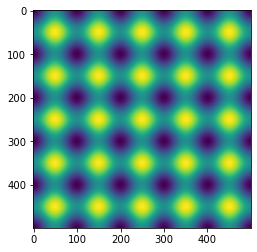

In [12]:
lattice = latticegen.anylattice_gen(r_k=0.01, theta=0, 
                                    order=1, symmetry=4)
plt.imshow(lattice.T)

Here, $r_k$ is one over the lattice constant, `theta` is the rotation angle of the lattice, and `symmetry=4` indicates a four-fold symmetric lattice.

<div class="alert alert-info">
**Note:** $r_k$ is designed to be easily used with diffraction patterns, i.e. FFT transforms of images. If you just want a physical lattice, you might find `latticegen.physical_lattice_gen()` more intuitive.
</div>

## The `order` parameter
To give more indication of what the `order` parameter, the maximum order of the Fourier/k-vector components does: The higher the order, the more well-resolved the atoms are as single spots. However, computational complexity increases fast.

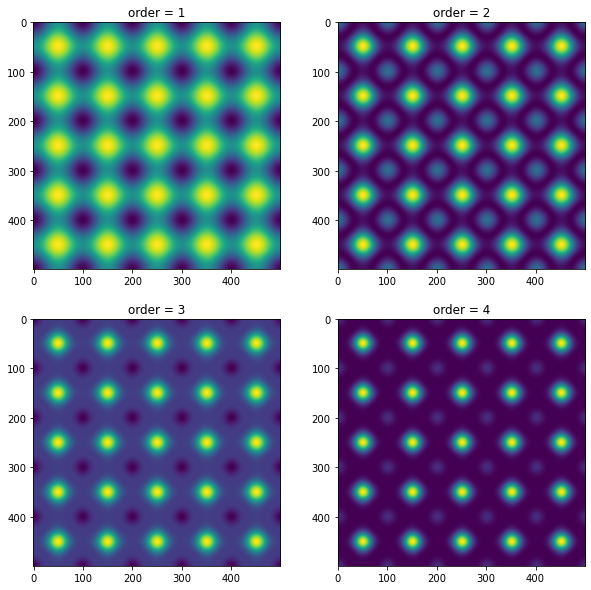

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=[10,10])
for i in range(4):
    ax.flat[i].imshow(latticegen.anylattice_gen(r_k=0.01, theta=0, 
                                    order=1+i, symmetry=4))
    ax.flat[i].set_title(f'order = {i+1}')


## Different symmetries

We can generate lattices of six-fold (triangular) symmetry and four-fold symmetry, as wel as an hexagonal lattice. These functions are also available separately as `trilattice_gen()`, `squarelattice_gen()`, `hexlattice_gen()`.

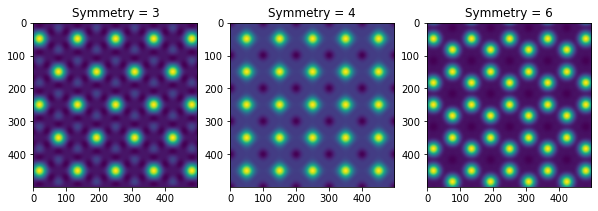

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=[10,4])
for i, sym in enumerate([3, 4, 6]):
    if sym == 6:
        data = latticegen.hexlattice_gen(r_k=0.01, theta=0, 
                                    order=3)
    else:
        data = latticegen.anylattice_gen(r_k=0.01, theta=0, 
                                    order=3, symmetry=sym)
    ax.flat[i].imshow(data)
    ax.flat[i].set_title(f'Symmetry = {sym}')


## A moiré superlattice of two lattices

Now, we can visualize what the moiré of two stacked lattices looks like and play around with the influence of deforming the top lattice.
We by default drop back to `order=2` to keep things snappy.

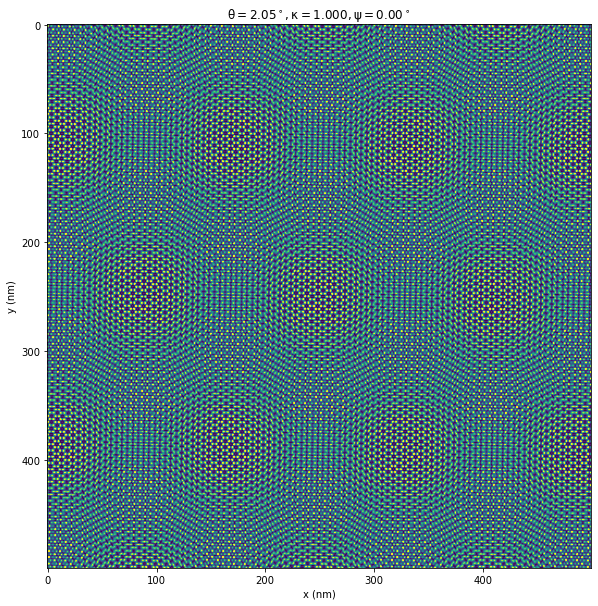

In [33]:
r_k = 0.2
theta=2.05
kappa=1.
psi=0.
xi=0.

lattice1 = 0.7*latticegen.hexlattice_gen(r_k, xi, 2)
lattice2 = latticegen.hexlattice_gen(r_k, theta+xi, 2, 
                                      kappa=kappa, psi=psi)

fig, ax = plt.subplots(figsize=[10,10])


data = (lattice1 + lattice2).compute()
im = ax.imshow(data.T,
               vmax=np.quantile(data,0.95),
               vmin=np.quantile(data,0.05),
              )
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')
ax.set_title(f'$\\theta = {theta:.2f}^\\circ, \\kappa = {kappa:.3f}, \\psi = {psi:.2f}^\\circ$');